# Proyecto de optimizacion en la inversión de CETES

## Objetivos

> ### General
+ Encontrar el mayor rendimiento de inversión, comprando tasas y plazos en distintos bonos y cetes

> ### Específicos
+ Obtener el rendimiento máximo utilizando optimización 
+ Encontrar una función objetivo optimizada que nos muestre los mejores puntos de inversion y la ganancia total

## Modelo que representa el problema

Un inversionesta cuenta con 3´000,000 de pesos y los quiere meter a CETES, en la página oficial del [Banco de México](https://www.banxico.org.mx/dyn/) el 30 de septiembre encontró que la oferta de CETES es la siguiente.

+ 28 días con una tasa del 7.61% se asignó una oferta de 6,000 CETES
 
+ 91 días con una tasa del 7.59% se asignó una oferta de 11,000 CETES
 
+ 182 días con una tasa del 7.45% se asignó una oferta de 13,000 CETES

+ 336 días con una tasa del 7.39% se asignó una oferta de 14,500 CETES
     
Con los datos anteriores, se busca maximizar el rendimiento del inversionista, siempre y cuando su inversión en algún CETE sea menor al 50%

Sabemos que los CETES tienen un valor nominal de 10 pesos MX, si queremos saber cual es el precio de cada CETE tenemos la siguite formula de valor presente:
     
 $$10/(Plazo/360)tasa+1$$
     
Entonces sacamos el precio de cada CETE y tenemos que:

+ CETES a 28 dias = $9.9412

+ CETES a 91 dias = $9.8118
     
+ CETES a 182 dias = $9.6370
     
+ CETES a 336 dias = $9.3548
 

### Función objetivo
Nuestro inversionista desea invertir en CETES, y Banxico le ofrece 4 tipos dependiendo del plazo y tasa de rendimiento, que ya sabemos, entonces tenemos que:
$$\max_{x_1,\cdots,x_4} 9.94x_1+9.81x_2+9.63x_3+9.35x_4$$

### Restricciones
El problema nos dice que el inversionista cuenta con solo 3´000,000 MX para los 4 tipos de CETES entonces:

$$9.94x_1+9.81x_2+9.63x_3+9.35x_4\leq 3´000,000$$

Tambien nos dice que se puede invertir solo hasta el 50% del capital en un solo CETE, entonces podemos decir que:

$$x_1\leq 1´500,000$$
$$x_2\leq 1´500,000$$
$$x_3\leq 1´500,000$$
$$x_4\leq 1´500,000$$

Por otro lado el Banco de México oferta solo sierta cantidad de CETES, es decir, existe un máximo de inversiones, podemos decir que:

$$x_1\leq 6,000$$
$$x_2\leq 11,000$$
$$x_3\leq 13,000$$
$$x_4\leq 14,500$$


### Forma matricial

- $\boldsymbol{c}=\left[-9.94\quad -9.81\quad -9.63\quad-9.35\right]^\top$,


- $\boldsymbol{A}=\left[\begin{array}{cc}9.94 & 9.81 & 9.63 & 9.35\\9.94 & 0 & 0 & 0 \\0 & 9.81 & 0 & 0 \\ 0 & 0 & 9.63 & 0 \\ 0 & 0 & 0 & 9.35\\ 9.94 & 0 & 0 & 0 \\0 & 9.81 & 0 & 0 \\ 0 & 0 & 9.63 & 0 \\ 0 & 0 & 0 & 9.35\end{array}\right]$, y


- $\boldsymbol{b}=\left[3´000,000\quad 1´500,000\quad 1´500,000\quad 1´500,000\quad 1´500,000\quad 6,000\quad 11,000\quad 13,000\quad 14,500\right]^\top$.

In [1]:
import numpy as np
import scipy.optimize as opt

In [2]:
c=np.array([[-9.94,-9.81,-9.63, -9.35]])

A_ub=np.array([[9.94,0,0,0], [0,9.81,0,0],[0,0,9.63,0],[0,0,0,9.35]
               ,[9.94,9.81,9.63,9.35],[9.94,0,0,0], [0,9.81,0,0],[0,0,9.63,0],[0,0,0,9.35]])
b_ub=np.array([6000,11000,13000,14500,3000000,1500000,1500000,1500000,1500000])

In [3]:
sol = opt.linprog(c,A_ub,b_ub)
sol

     con: array([], dtype=float64)
     fun: -44500.0
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([0.0000000e+00, 0.0000000e+00, 1.8189894e-12, 1.8189894e-12,
       2.9555000e+06, 1.4940000e+06, 1.4890000e+06, 1.4870000e+06,
       1.4855000e+06])
  status: 0
 success: True
       x: array([ 603.62173038, 1121.30479103, 1349.94807892, 1550.80213904])

In [4]:
sol.x

array([ 603.62173038, 1121.30479103, 1349.94807892, 1550.80213904])

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

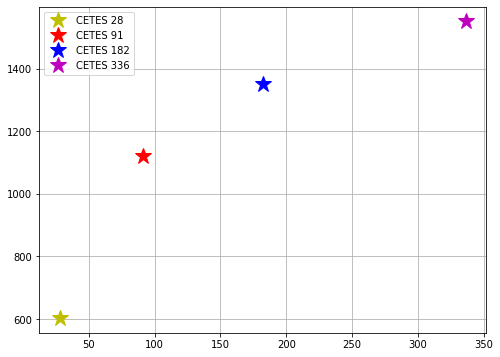

In [20]:

plt.figure(figsize=(8,6))
plt.plot([28],[sol.x[0]],"*y",ms=17,label="CETES 28")
plt.plot([91],[sol.x[1]],"*r",ms=17,label="CETES 91")
plt.plot([182],[sol.x[2]],"*b",ms=17,label="CETES 182")
plt.plot([336],[sol.x[3]],"*m",ms=17,label="CETES 336")

plt.grid()
plt.legend(loc="best")
plt.show()


### Conclusión
Para obtener el rendimiento maximo invirtiendo en CETES, el programa nos dice que se deben invertir en 603 CETES a 28 dias, 1121 CETES a 91 dias, 1349 CETES a 182 dias y 1550 CETES a 336 dias. De esta manera obtendremos una ganancia total de $44,500 pesos. Aunque parezca una ganancia muy pequeña ante nuestra inversión de 3'000,000, debido a que los CETES son bonos gubernamentales tienen riesgo y rendimiento mínimo.